<a name="pagetop"></a>
<div style="width:1000 px">

<div style="float:right; width:98 px; height:98px;"><img src="https://pbs.twimg.com/profile_images/1187259618/unidata_logo_rgb_sm_400x400.png" alt="Unidata Logo" style="height: 98px;"></div>

<h1>Declarative Plotting with Satellite Data</h1>
<h3>Unidata Python Workshop</h3>

<div style="clear:both"></div>
</div>

<hr style="height:2px;">

<div style="float:right; width:300 px"><img src="https://unidata.github.io/MetPy/latest/_images/sphx_glr_GINI_Water_Vapor_001.png" alt="Example Satellite Image" style="height: 350px;"></div>


## Overview:

* **Teaching:** 20 minutes
* **Exercises:** 15 minutes

### Questions
1. How can satellite data be accessed with siphon?
1. How can maps of satellite data be made using the declarative plotting interface?

### Table of Contents
1. <a href="#dataaccess">Accessing data with Siphon</a>
1. <a href="#plotting">Plotting the data</a>

<a name="dataaccess"></a>
## Accessing data with Siphon

As we saw with the PlottingSatelliteData notebook, GOES 16/17 data is available via the Unidata THREDDS server and can be accessed with siphon. We make use of fstrings in order to provide date, region, and channel variables to the URL string.

In [1]:
from siphon.catalog import TDSCatalog
from datetime import datetime

In [2]:
# Create variables for URL generation
image_date = datetime.utcnow().date()
region = 'Mesoscale-1'
channel = 8

# Create the URL to provide to siphon
data_url =  ('https://thredds.ucar.edu/thredds/catalog/satellite/goes/east/products/'
            f'CloudAndMoistureImagery/{region}/Channel{channel:02d}/'
            f'{image_date:%Y%m%d}/catalog.xml')

In [3]:
cat = TDSCatalog(data_url)

In [4]:
dataset = cat.datasets[1]
print(dataset)

OR_ABI-L2-CMIPM1-M6C08_G16_s20200090750280_e20200090750280_c20200090750280.nc


In [5]:
ds = dataset.remote_access(use_xarray=True)
print(ds)

<xarray.Dataset>
Dimensions:               (x: 500, y: 500)
Coordinates:
    time                  datetime64[ns] ...
  * y                     (y) float32 119812.0 119756.0 ... 91924.0 91868.0
  * x                     (x) float32 -13972.0 -13916.0 ... 13916.0 13972.0
Data variables:
    Sectorized_CMI        (y, x) float32 ...
    fixedgrid_projection  int32 ...
Attributes:
    title:                       Sectorized Cloud and Moisture Imagery for th...
    ICD_version:                 GROUND SEGMENT (GS) TO ADVANCED WEATHER INTE...
    Conventions:                 CF-1.6
    channel_id:                  8
    central_wavelength:          6.19
    abi_mode:                    6
    source_scene:                Mesoscale-1
    periodicity:                 0.5
    production_location:         RBU
    product_name:                EMESO-020-B12-M6C08
    satellite_id:                GOES-16
    product_center_latitude:     38.49225636895932
    product_center_longitude:    -75.0000000000

<a name="plotting"></a>
## Plotting the Data

To plot our data we'll be using MetPy's new declarative plotting functionality. You can write lots of matplotlib based code, but this interface greatly reduces the number of lines you need to write to get a great starting plot and then lets you customize it. The declarative plotting interface consists of three fundamental objects/concepts:

* **Plot** - This is the actual representation of the data and can be `ImagePlot`, `ContourPlot`, or `Plot2D`.
* **Panel** - This is a single panel (i.e. coordinate system). Panels contain plots. Currently the `MapPanel` is the only panel type available.
* **Panel Container** - The container can hold multiple panels to make a multi-pane figure. Panel Containers can be thought of as the whole figure object in matplotlib.

So containers have panels which have plots. It takes a second to get that straight in your mind, but it makes setting up complex figures very simple.

For this plot we need a single panel and we want to plot the satellite image, so we'll use the `ImagePlot`.

In [6]:
from metpy.plots import ImagePlot, MapPanel, PanelContainer
%matplotlib inline

Let's start out with the smallest element, the plot, and build up to the largest, the panel container.

First, we'll make the `ImagePlot`:

In [7]:
img = ImagePlot()
img.data = ds
img.field = 'Sectorized_CMI'

Next, we'll make the panel that our image will go into, the `MapPanel` object and add the image to the plots on the panel.

In [8]:
panel = MapPanel()
panel.plots = [img]

Finally, we make the `PanelContainer` and add the panel to its container. Remember that since we can have multiple plots on a panel and multiple panels on a plot, we use lists. In this case is just happens to be a list of length 1.

In [9]:
pc = PanelContainer()
pc.panels = [panel]

Unlike working with matplotlib directly in the notebooks, this figure hasn't actually been rendered yet. Calling the `show` method of the panel container builds up everything, renders, and shows it to us.

/home/travis/miniconda/envs/training/lib/python3.7/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/10m/physical/ne_10m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


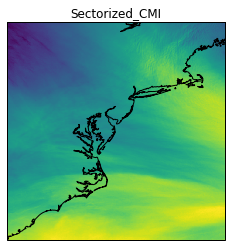

In [10]:
pc.show()

### Exercise
* Look at the documentation for the `ImagePlot` [here](https://unidata.github.io/MetPy/latest/api/generated/metpy.plots.ImagePlot.html#metpy.plots.ImagePlot) and figure out how to set the colormap of the image. For this image, let's go with the `WVCIMSS_r` colormap as this is a mid-level water vapor image. Set the range for the colormap to 195-265 K.
* BONUS: Use the MetPy `add_timestamp` method from `metpy.plots` to add a timestamp to the plot. You can get the axes object to plot on from the `ImagePlot`. The call will look something like `img.ax`. This needs to happen after the panels have been added to the `PanelContainer`.
* DAILY DOUBLE: Using the `start_date_time` attribute on the dataset `ds`, change the call to `add_timestamp` to use that date and time and the pretext to say `GOES 16 Channel X`.

In [11]:
# Import for the bonus exercise
from metpy.plots import add_timestamp

# Make the image plot
# YOUR CODE GOES HERE

# Make the map panel and add the image to it
# YOUR CODE GOES HERE

# Make the panel container and add the panel to it
# YOUR CODE GOES HERE

# Show the plot
# YOUR CODE GOES HERE

#### Solution

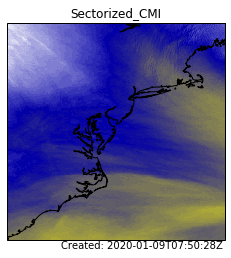

In [12]:
# %load solutions/sat_map.py


# Cell content replaced by load magic replacement.
# Import for the bonus exercise
from metpy.plots import add_timestamp

# Make the image plot
img = ImagePlot()
img.data = ds
img.field = 'Sectorized_CMI'
img.colormap = 'WVCIMSS_r'
img.image_range = (195, 265)

# Make the map panel and add the image to it
panel = MapPanel()
panel.plots = [img]

# Make the panel container and add the panel to it
pc = PanelContainer()
pc.panels = [panel]

# Bonus
start_time = datetime.strptime(ds.start_date_time, '%Y%j%H%M%S')
add_timestamp(panel.ax, time=start_time)

# Show the plot
pc.show()